#**Deep Learning**

In [1]:
import pandas as pd
df = pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss='mse',optimizer='sgd')
x= df.iloc[:,0]
y= df.iloc[:,1]
res = model.fit(x,y,epochs=500,verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 317ms/step - loss: 6503103488.0000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 595483456.0000
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 183108544.0000
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 153439760.0000
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 150431408.0000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 149287632.0000
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 148281648.0000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 147293008.0000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 146313424.0000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 145342128.0000
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 144378976.0000
Epoch 12/500
1/1 [=============================

In [5]:
print("first loss: ",res.history['loss'][0],"\n","last loss:  ",res.history['loss'][-1],sep='')

first loss: 6503103488.0
last loss:  33060850.0


1/1 [==============================] - 0s 82ms/step


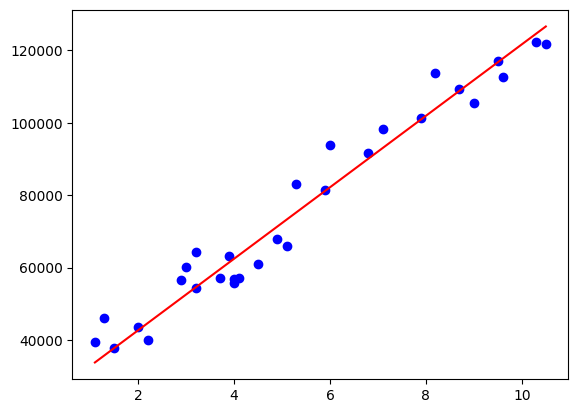

In [6]:
import matplotlib.pyplot as plt
yp = model.predict(x)
plt.scatter(x,y,c='blue')
plt.plot(x,yp,c='r')
plt.show()

Text(0, 0.5, 'loss')

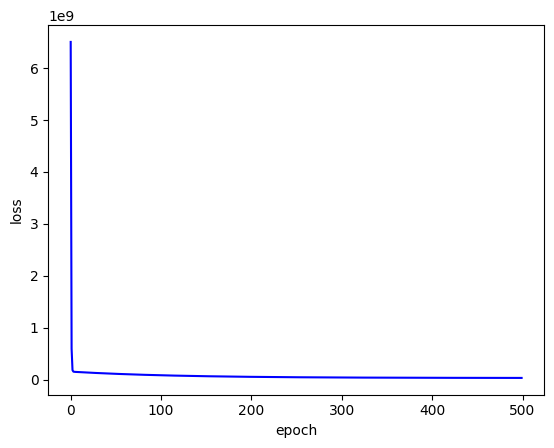

In [7]:
plt.plot(res.history['loss'],c='blue')
plt.xlabel('epoch')
plt.ylabel('loss')

In [8]:
from sklearn.metrics import r2_score
print('Accuracy Score:',round(r2_score(y,yp)*100,2),'%')

Accuracy Score: 95.45 %




---
---
#Applying on Auto mpg


In [26]:
df = pd.read_csv('/content/auto-mpg_without nan.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,USA,ford torino


In [27]:
df.origin = df.origin.astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int8   
 8   name          392 non-null    object 
dtypes: float64(3), int64(4), int8(1), object(1)
memory usage: 25.0+ KB


In [28]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,1:8]
y = df.iloc[:,0]
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
model = Sequential()
model.add(Dense(16,input_shape=(7,),activation='relu'))
model.add(Dense(4))
model.add(Dense(1))


In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                128       
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
model.compile(loss='mse',optimizer='sgd',metrics='mse')
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)
res = model.fit(x_train,y_train,epochs=30,verbose=0)

In [32]:
print("first loss: ",res.history['loss'][0],"\n","last loss:  ",res.history['loss'][-1],sep='')

first loss: 298.77032470703125
last loss:  15.378942489624023


In [33]:
yp = model.predict(x_test)
r2_score(y_test,yp)


3/3 [==============================] - 0s 2ms/step


0.8365026904287908

---
---
#Boston Housing

In [36]:
from keras.datasets import boston_housing
(x_train,y_train), (x_test,y_test) = boston_housing.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,sep='\n')

(404, 13)
(404,)
(102, 13)
(102,)


#By Using Multi Perceptron

In [37]:
model = Sequential()
model.add(Dense(16,input_dim=13,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                224       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
model.compile(loss='mse',optimizer='sgd',metrics='mse')
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
res = model.fit(x_train,y_train,epochs=50,verbose=0)

In [40]:
print("first loss: ",res.history['loss'][0],"\n","last loss:  ",res.history['loss'][-1],sep='')

first loss: 299.34759521484375
last loss:  12.5703125


In [41]:
yp = model.predict(x_test)
loss , acc =model.evaluate(x_train,y_train)
r2_score(y_test,yp)

13/13 [==============================] - 0s 1ms/step - loss: 6.9279 - mse: 6.9279


0.7874015562111342

#By using One Perceptron

In [42]:
oneper = Sequential()
oneper.add(Dense(1,input_dim=13,activation='relu'))
oneper.compile(loss='mse',optimizer='sgd',metrics='mse')
res2 = oneper.fit(x_train,y_train,epochs=50,verbose=0)

In [43]:
print("first loss: ",res2.history['loss'][0],"\n","last loss:  ",res2.history['loss'][-1],sep='')

first loss: 523.4015502929688
last loss:  22.393638610839844


In [44]:
yp2 = oneper.predict(x_test)
loss , acc =oneper.evaluate(x_test,y_test)
r2_score(y_test,yp2)

4/4 [==============================] - 0s 2ms/step - loss: 21.0721 - mse: 21.0721


0.7468626496164116